<a href="https://colab.research.google.com/github/doshimihir07/python_colab/blob/main/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 19.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [18]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
# Write your code here to read the data
df=pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
df.shape

(1898, 9)

#### Observations: there are 1898 rows and 9 columns present


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The datatypes of the different columns are: 4 are int, 4 are string/object and 1 is of float type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing value

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Min food perparation time : 20 mins \
Average food preparation time : 27 mins \
Max food preparation time : 35 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [63]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [16]:
# Write the code here
df[df['rating']=='Not given'].shape[0]

736

#### Observations:
There are 736 orders which are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [42]:
# Write the code here

## Starting with checking the variables and unique values
df['rating'].unique()
# replacing values with nan where rating is not provided
df['rating'] = df['rating'].replace(['Not given'],np.nan)
df['rating'] = df['rating'].astype('float') # converting to float type from string type
df['rating'].unique() # confirming by checking unique values

array([nan,  5.,  3.,  4.])

In [59]:
## checking unique values to confirm Nulls or invalid answers
df['order_id'].unique()
df['customer_id'].unique()
df['restaurant_name'].unique()
df['cuisine_type'].unique()
df['cost_of_the_order'].unique()
df['day_of_the_week'].unique()
df['food_preparation_time'].unique()
df['delivery_time'].unique()
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
rating,1162.000,4.344,0.741,3.000,4.000,5.000,5.000,5.000
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [116]:
## Checking for outliers, repeated this part for all fields to check for a pattern.
Q1 = df['cost_of_the_order'].quantile(0.25)
Q3 = df['cost_of_the_order'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['cost_of_the_order'] < lower_bound) | (df['cost_of_the_order'] > upper_bound)]
outliers

## Observation : No outliers found in data for any fields

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


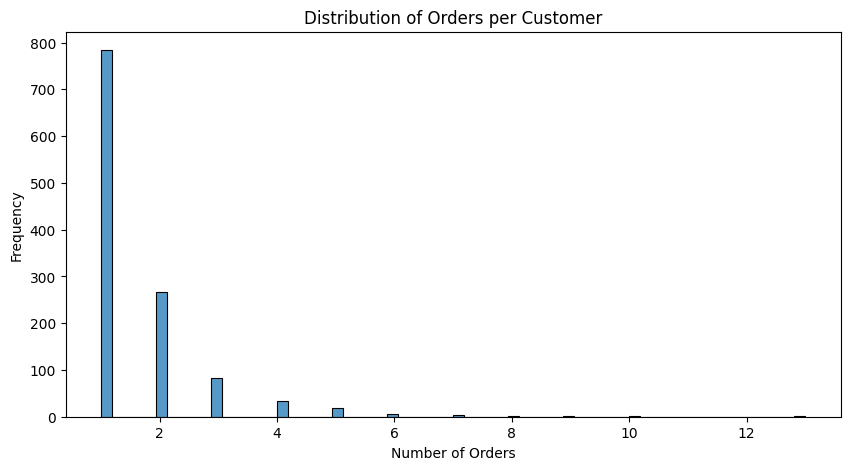

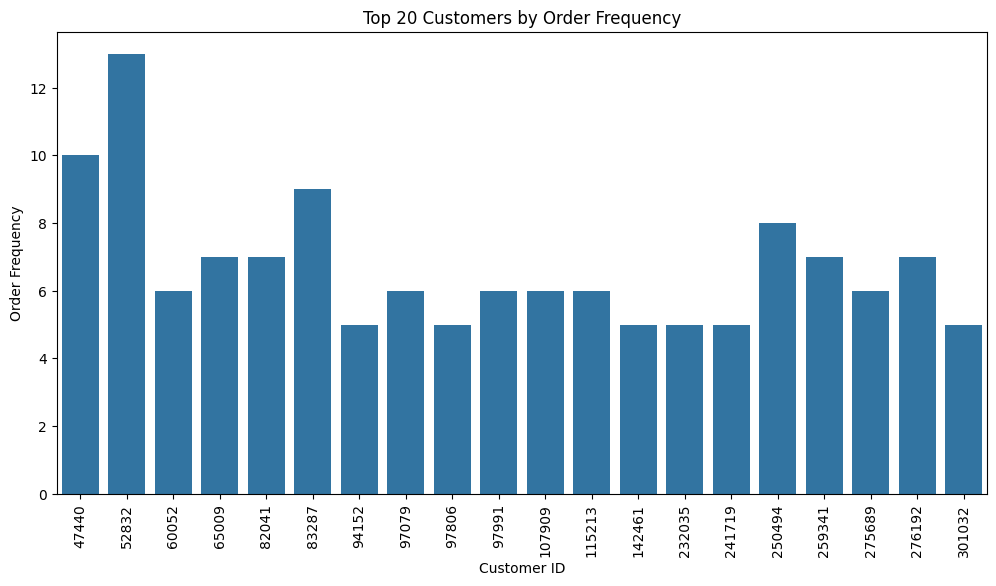

In [93]:
## Univariant analysis of customer_id

# Checking how many customers are frequent/return customers
plt.figure(figsize=(10,5))
sns.histplot(df['customer_id'].value_counts(), kde=False)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

# Checking frequency of orders per customer using a barplot
# Calculate order frequency for each customer
order_frequency = df['customer_id'].value_counts().head(20)  # Top 20 customers


# Plot
plt.figure(figsize=(12, 6))  # Increase figure size to prevent cramping
sns.barplot(x=order_frequency.index, y=order_frequency.values)
plt.title('Top 20 Customers by Order Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Order Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

df.drop('order_frequency',axis=1,inplace=True)

## Observation 1 : Most customers order only once,some order twice, so not a lot of return customers.
## Observation 2 : customer_id 52832 placed most orders (13 orders), followed by customer_id 47440

Total unique restaurants: 178


<ipython-input-119-5c3669928850>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurant_counts.values, y=top_restaurant_counts.index, palette='viridis');


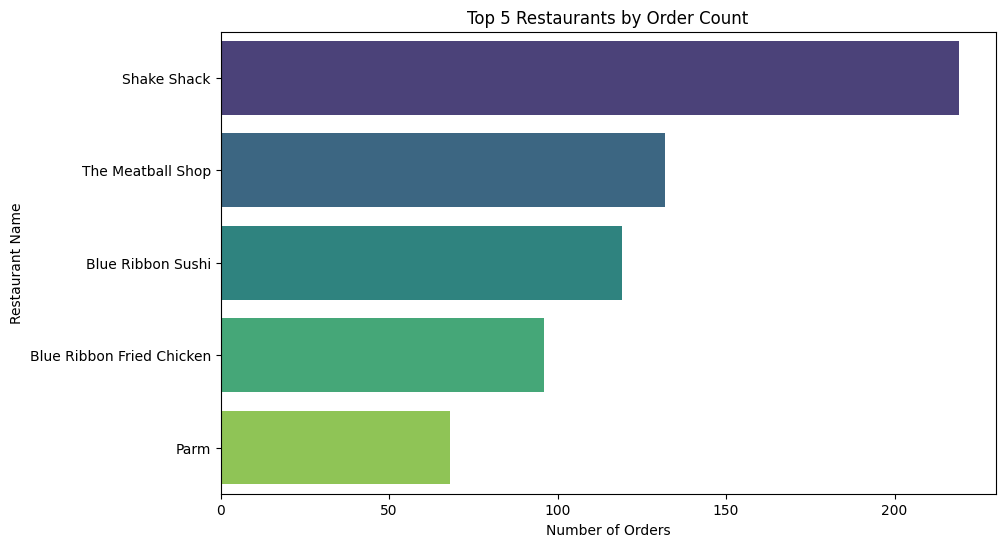

In [119]:
## Univariant analysis of restaurant_name

print(f"Total unique restaurants: {df['restaurant_name'].nunique()}")

top_restaurant_counts = df['restaurant_name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_restaurant_counts.values, y=top_restaurant_counts.index, palette='viridis')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.title(f'Top 5 Restaurants by Order Count')
plt.show();



## Observation 1: Total unique restaurants 178
## Observation 2: Shake Shack has handled the most orders by volume (219)

Total unique restaurants: 14
Most common cuisine types
cuisine_type
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: count, dtype: int64
Least common cuisine types
cuisine_type
French        18
Southern      17
Korean        13
Spanish       12
Vietnamese     7
Name: count, dtype: int64


<ipython-input-133-3f789556a33e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['cuisine_type'].value_counts().head(5).values, y=df['cuisine_type'].value_counts().head(5).index, palette='viridis')


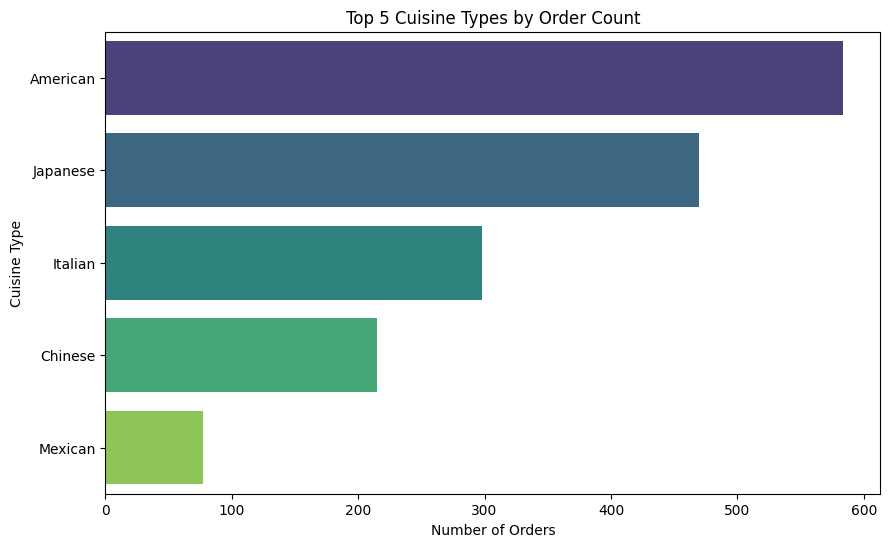

In [133]:
## Univariant analysis of cuisine_type
print(f"Total unique restaurants: {df['cuisine_type'].nunique()}")

print ("Most common cuisine types")
print(df['cuisine_type'].value_counts().head(5))
print ("Least common cuisine types")
print(df['cuisine_type'].value_counts().tail(5))

plt.figure(figsize=(10, 6))
sns.barplot(x=df['cuisine_type'].value_counts().head(5).values, y=df['cuisine_type'].value_counts().head(5).index, palette='viridis')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.title(f'Top 5 Cuisine Types by Order Count')
plt.show();


## Observation 1: There are 14 unique cuisines servered in these resturants
## Observation 2: American is most common (servered in 584 resturants) and Vietnamese is lease common (servered in only 7 resturants)

count   1898.000
mean      16.499
std        7.484
min        4.470
25%       12.080
50%       14.140
75%       22.297
max       35.410
Name: cost_of_the_order, dtype: float64
The most frequent order value is: 12.18 (Frequency: 86)


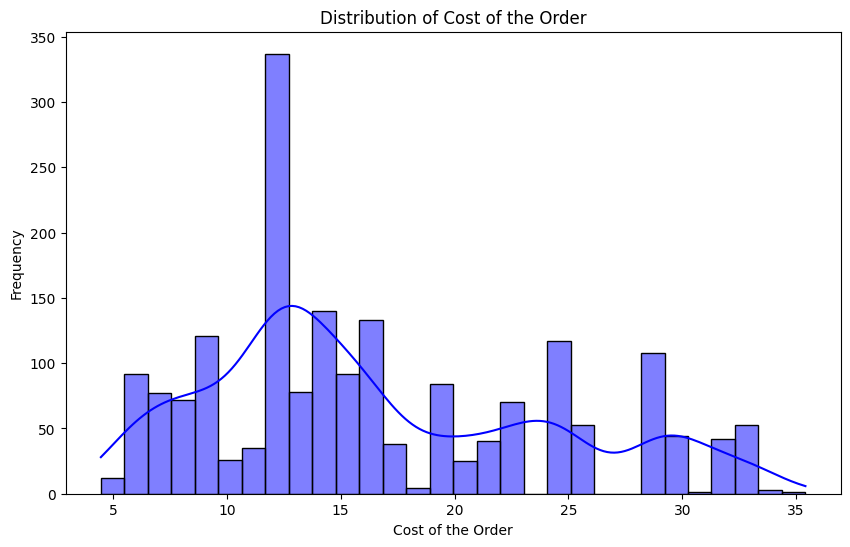

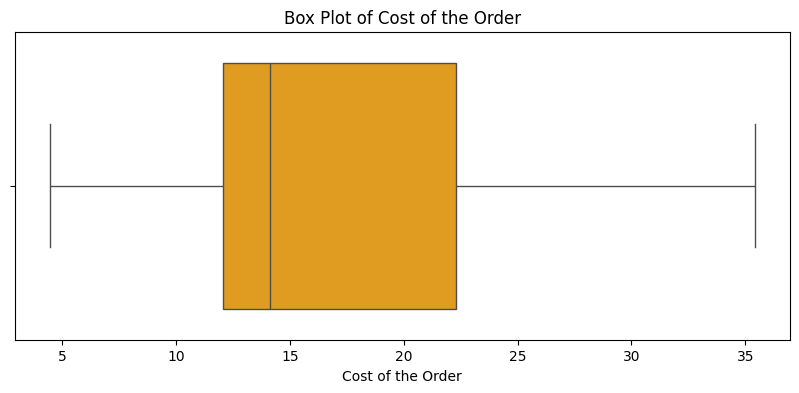

In [141]:
## Univariant analysis of cost_of_the_order

print(df['cost_of_the_order'].describe())

most_frequent_value = df['cost_of_the_order'].value_counts().idxmax()
frequency = df['cost_of_the_order'].value_counts().max()

print(f"The most frequent order value is: {most_frequent_value} (Frequency: {frequency})")


plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], kde=True, bins=30, color='blue')
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['cost_of_the_order'], color='orange')
plt.title('Box Plot of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.show()


## Observation 1: Minimum order value is 4.47 and the highest order value is 35.41. The average order value is 16.49
## Observation 2: The most common order value is 12.18 (ordered 86 times)


Proportion of orders:
day_of_the_week
Weekend   71.180
Weekday   28.820
Name: count, dtype: float64


<ipython-input-145-720cdc7b1d95>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="pastel")


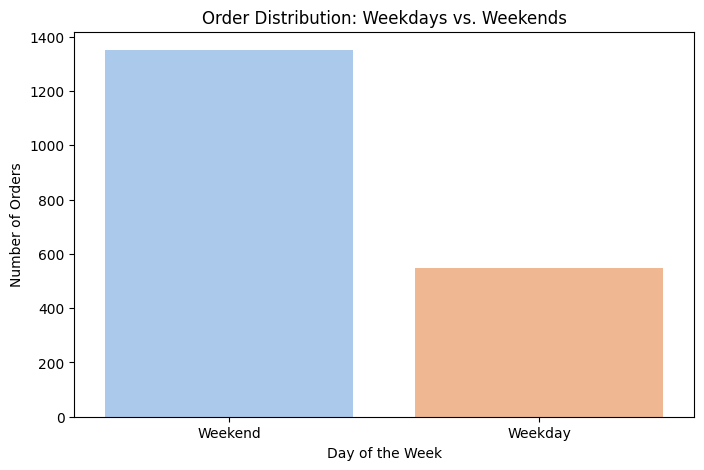

In [145]:
## Univariant analysis of day_of_the_week
# find average orders for weekdays and weekends which are values of day_of_the_week
day_counts = df['day_of_the_week'].value_counts()

total_orders = day_counts.sum()
proportions = (day_counts / total_orders) * 100
print("Proportion of orders:")
print(proportions)


plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="pastel")
plt.title("Order Distribution: Weekdays vs. Weekends")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.show()


## Observation 1: Weekends recieve 71% of the orders and weekdays get 28%


Proportion of ratings:
rating
Not given   38.778
5           30.980
4           20.337
3            9.905
Name: count, dtype: float64


<ipython-input-153-023a4c561785>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette="pastel")


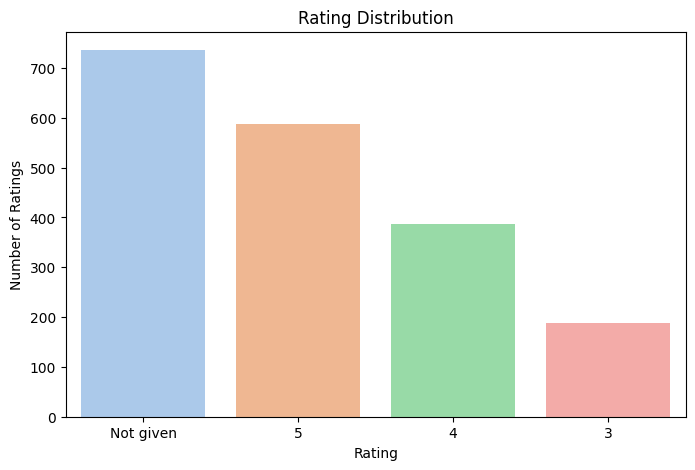

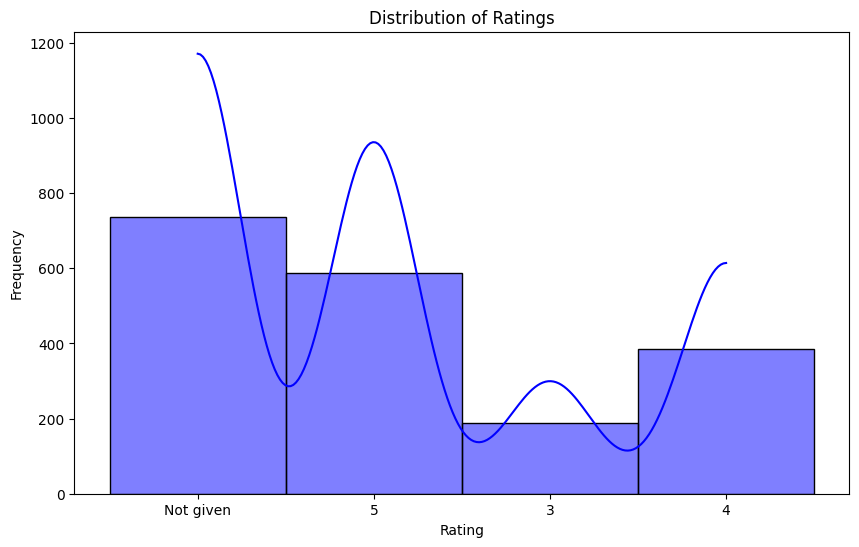

In [153]:
## Univariant analysis of rating
ratings_counts = df['rating'].value_counts()

total_ratings = ratings_counts.sum()
proportions = (ratings_counts / total_ratings) * 100
print("Proportion of ratings:")
print(proportions)

plt.figure(figsize=(8, 5))
sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette="pastel")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Observation 1: for 38% of the orders there was no rating, 30% had rating of 5 and worst rating was 3 with 9.9% giving that rating.

Mean Preparation Time: 27.371970495258168
Median Preparation Time: 27.0


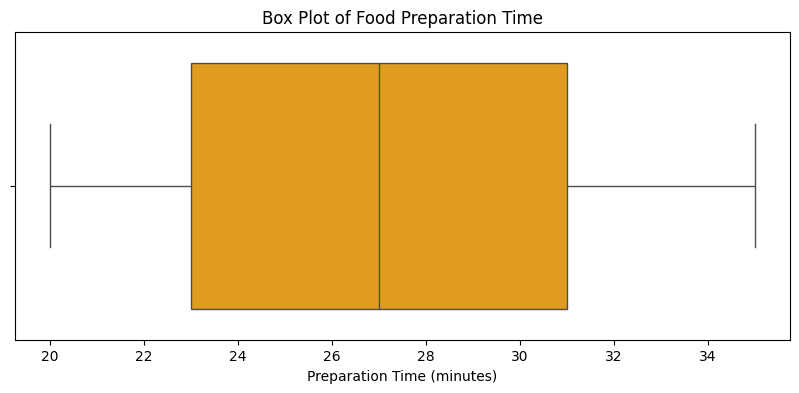

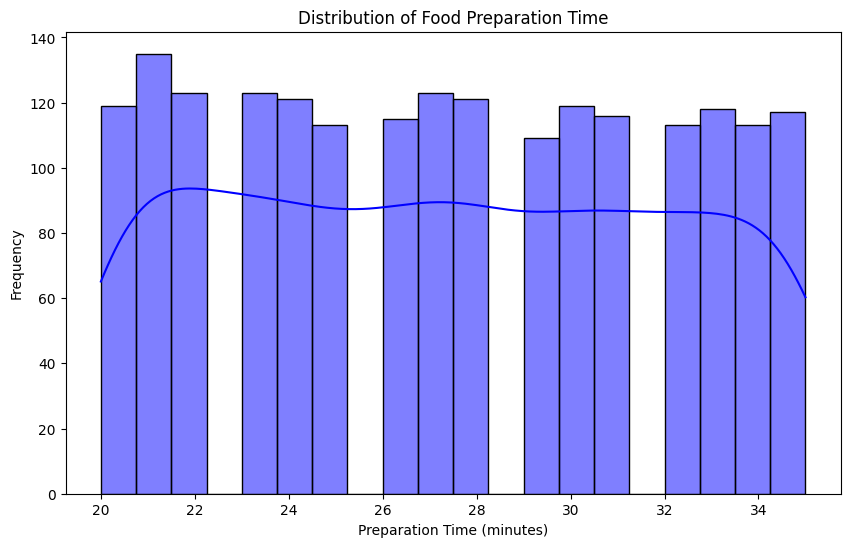

In [159]:
## Univariant analysis of food_preparation_time

mean_prep_time = df['food_preparation_time'].mean()
median_prep_time = df['food_preparation_time'].median()

print(f"Mean Preparation Time: {mean_prep_time}")
print(f"Median Preparation Time: {median_prep_time}")

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['food_preparation_time'], color='orange')
plt.title('Box Plot of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['food_preparation_time'], bins=20, kde=True, color='blue')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()


# Observation 1: The avg preparation time is 27.3 mins
# Observation 2: The most common prepartion time is 21 mins. But other than that the frequency is fairly distributed



count   1898.000
mean      24.162
std        4.973
min       15.000
25%       20.000
50%       25.000
75%       28.000
max       33.000
Name: delivery_time, dtype: float64
0    24
Name: delivery_time, dtype: int64


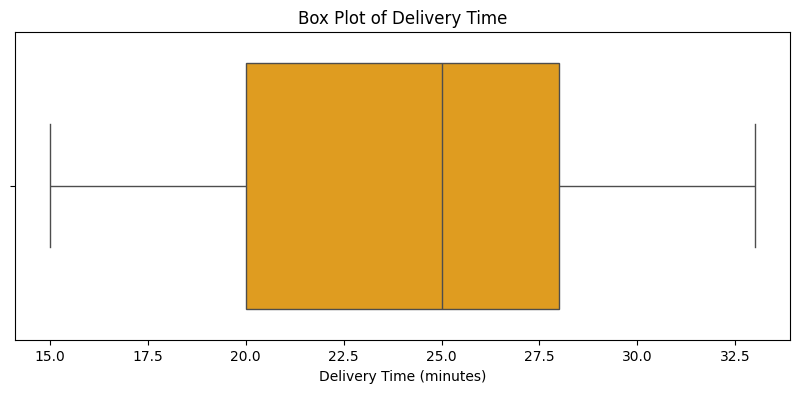

Text(0.5, 0, 'Delivery Time (minutes)')

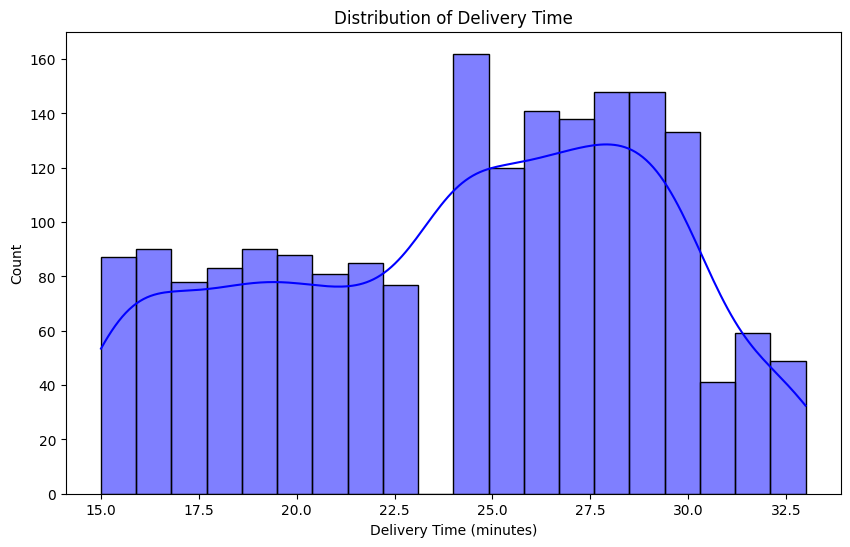

In [163]:
# Univariant analysis of delivery_time
print(df['delivery_time'].describe())
print(df['delivery_time'].mode())

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['delivery_time'], color='orange')
plt.title('Box Plot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time'], bins=20, kde=True, color='blue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')

## Observation 1 : Delivery time ranges from 15 mins to 33 mins with most common delivery time being 24 mins.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---